In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, visualize



In [4]:
color = "#669999"

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
", ".join(df.columns.tolist())

'medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type, publisher, language_text, language_original, pages, format, comment_isbn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, keyword_LoC, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, year_publication, literary_texts, source, content_type_ppn, DDC_sachgruppe_a, DDC_sachgruppe_b, DDC_sachgruppe_c, keyword_fremd_ppn, keyword_fremd, keyword_einzel_ppn, keyword_einzel, keyword_BDSL_a, keyword_BDS

In [8]:
df.shape

(1041157, 77)

In [9]:
sorted(df.year_publication.unique())


[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [10]:
df.fillna(value=np.nan, inplace=True)


In [11]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                                NaN  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19               NaN              NaN           NaN   
1678415065     EBP:08-10-19               NaN              NaN           NaN   
1678415065     EBP:08-10-19               NaN              NaN           NaN   
1678415065     EBP:08-10-19               NaN              NaN           NaN   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19               NaN              NaN           NaN   
448323834     6055:07-05-19               NaN              NaN           NaN   
44832184X     6055:07-05-19            Sylvia            Truxa           NaN   
44832184X     6055:07-05-19            Sylvia            Truxa           NaN   
44832184X     6055:07-05-19            Sylvia            Truxa           NaN   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407               NaN              NaN  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X                NaN              NaN  ...   
44832184X                NaN              NaN  ...   
44832184X                NaN              NaN  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                                NaN   
1678415065                                                NaN   
1678415065                                                NaN   
1678415065                                                NaN   
1678415065      

# Describe Data

In [12]:
df.shape

(1041157, 77)

In [13]:
#df["source"]
df["ppn"]
df["source_ppn"] = df["source"] + "_" + df["ppn"]

In [14]:
df.groupby("source_ppn").head(1).shape


(334221, 78)

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


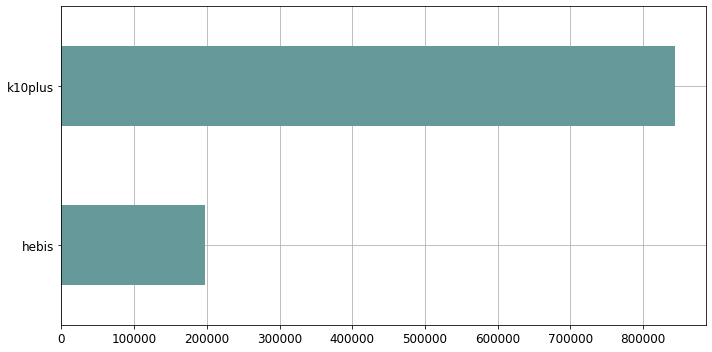

In [15]:
#df["source"].value_counts()
visualize.plot_bar_counter(df, "source", percentage=False)


In [16]:
def plot_bar_stacked_counter(df, column_to_count, head = 99999999, percentage = True, cmap = "tab10_r", title = "", figsize = (10,5), xlabel = "", ylabel = "", wdir = "./../visualizations/", figure_name = "bar_counter"):
    """
        bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium of entries", xlabel= "percentage", ylabel = "medium", figure_name = "")
    """

    #pd.DataFrame(df.groupby([column_to_count]).count().iloc[:,0]).T.plot.barh(stacked=True)

    if percentage == True:
        new_df = pd.DataFrame(df['source'].value_counts(normalize=True)*100)
    else:
        new_df = pd.DataFrame(df['source'].value_counts()).T.plot.barh(stacked=True)


    ax = new_df.T.plot.barh(stacked=True, cmap = cmap, grid=True, figsize = figsize, fontsize=12, title = title)
    ax.set_axisbelow(True)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    plt.tight_layout()

    fig = ax.get_figure()
    fig.savefig( wdir + figure_name + ".png", dpi=300, format="png")
    fig.show()
    return new_df

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:145: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


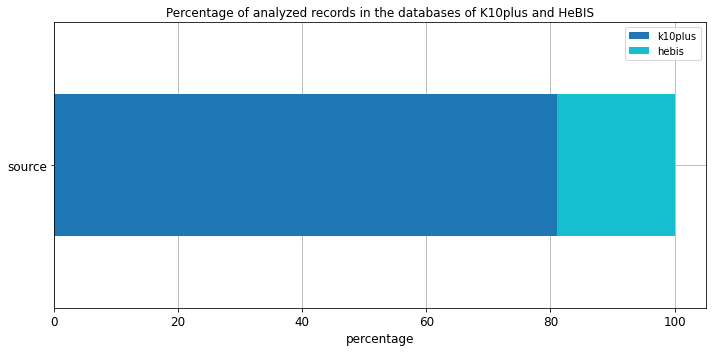

In [17]:
new_df = visualize.plot_bar_stacked_counter(df, "source",  cmap="tab10",title = "Percentage of analyzed records in the databases of K10plus and HeBIS", xlabel = "percentage", figure_name = "figure_02_percentage_consortia")

In [18]:
df["source"].value_counts()

k10plus    843558
hebis      197599
Name: source, dtype: int64

In [19]:
new_df

source
k10plus  81.02121
hebis    18.97879

## Completeness of the Fields


In [20]:
df.notna().sum().div(df.shape[0]).sort_values()

literary_texts     0.0
uri                0.0
keyword_BDSL_t     0.0
keyword_BDSL_p     0.0
expression_info    0.0
                  ... 
ILNs               1.0
entry_first        1.0
year               1.0
source             1.0
source_ppn         1.0
Length: 78, dtype: float64

<AxesSubplot:>

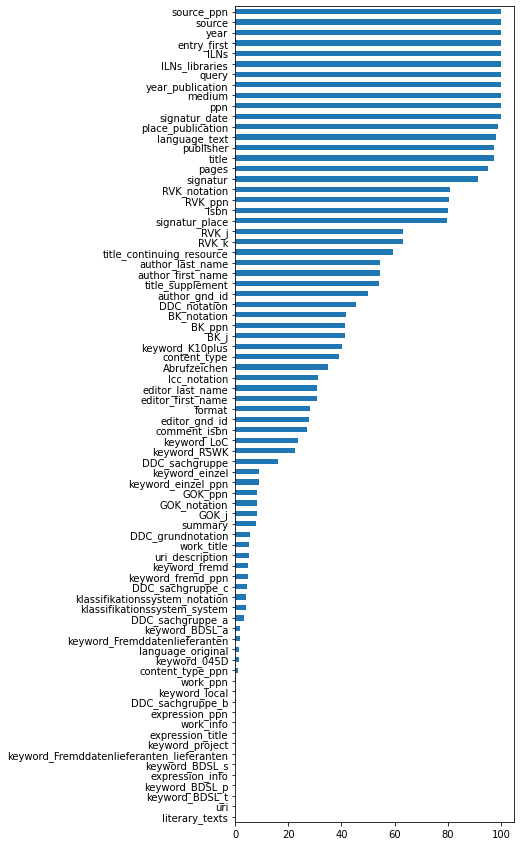

In [21]:

(df.notna().sum().div(df.shape[0])*100).sort_values().plot.barh(figsize=(5,15))


In [22]:
selected_columns = ['ppn',
 'medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_last_name',
 'editor_last_name',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_title',
 'expression_title',
 'DDC_notation',
 'BK_notation',
 'RVK_notation',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'uri',
 'GOK_notation'
]

In [23]:
visualize.plot_bar_not_nas

<function librarian_robot.visualize.plot_bar_not_nas(df, figsize=(5, 10), title='', color='#669999', xlabel='', ylabel='', outdir='./../visualizations/', figure_name='bat_plot_not_na')>

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


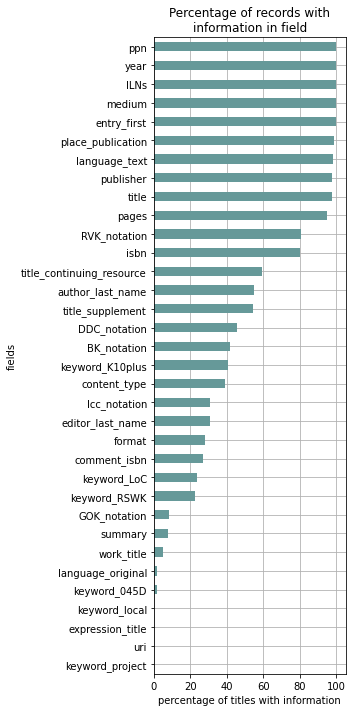

In [24]:
visualize.plot_bar_not_nas(df[selected_columns], title = "Percentage of records with\ninformation in field", xlabel = "percentage of titles with information", ylabel = "fields", figure_name = "percentage_titles_fields")

## Chronological Distribution

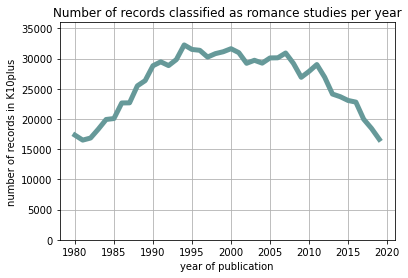

In [25]:
visualize.plot_line_year_value_counts(df["year_publication"], title = "Number of records classified as romance studies per year", xlabel= "year of publication", ylabel= "number of records in K10plus", figure_name = "number_records_years", ylim = (0,36000))

In [26]:
years_source_df = df.groupby(["source", "year_publication"])["source"].count().unstack().T.fillna(0)

In [27]:
years_source_df

source            hebis  k10plus
year_publication                
1980               3627    13703
1981               3340    13167
1982               3677    13171
1983               4053    14270
1984               4386    15535
1985               4355    15722
1986               5089    17565
1987               5355    17320
1988               5908    19579
1989               5926    20427
1990               6169    22648
1991               6111    23354
1992               6027    22816
1993               5755    24086
1994               5779    26483
1995               5834    25681
1996               5872    25501
1997               5691    24563
1998               5745    25077
1999               5593    25542
2000               5823    25814
2001               5585    25400
2002               5531    23693
2003               5371    24350
2004               5275    23975
2005               5520    24592
2006               5028    25104
2007               5105    25819
2008               4745    24460
2009               4602    22301
2010               4316    23566
2011               4346    24670
2012               4114    22811
2013               4065    20066
2014               4241    19451
2015               3957    19112
2016               4451    18345
2017               3870    16094
2018               3903    14548
2019               3459    13177

In [28]:
years_source_rel_df = years_source_df.loc[:].div(df.groupby("year_publication")["ppn"].count(), axis="index")*100

In [29]:
years_source_rel_df

source                hebis    k10plus
year_publication                      
1980              20.929025  79.070975
1981              20.233840  79.766160
1982              21.824549  78.175451
1983              22.119740  77.880260
1984              22.016967  77.983033
1985              21.691488  78.308512
1986              22.464024  77.535976
1987              23.616318  76.383682
1988              23.180445  76.819555
1989              22.487003  77.512997
1990              21.407503  78.592497
1991              20.739861  79.260139
1992              20.895885  79.104115
1993              19.285547  80.714453
1994              17.912715  82.087285
1995              18.511820  81.488180
1996              18.716731  81.283269
1997              18.810736  81.189264
1998              18.639284  81.360716
1999              17.963706  82.036294
2000              18.405664  81.594336
2001              18.024851  81.975149
2002              18.926225  81.073775
2003              18.071397  81.928603
2004              18.034188  81.965812
2005              18.331562  81.668438
2006              16.686579  83.313421
2007              16.508214  83.491786
2008              16.247218  83.752782
2009              17.105899  82.894101
2010              15.479521  84.520479
2011              14.977943  85.022057
2012              15.279480  84.720520
2013              16.845551  83.154449
2014              17.900557  82.099443
2015              17.152889  82.847111
2016              19.525355  80.474645
2017              19.384893  80.615107
2018              21.153325  78.846675
2019              20.792258  79.207742

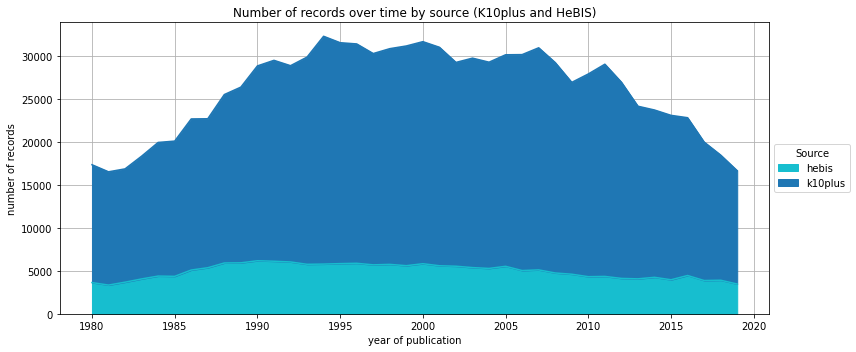

In [30]:
visualize.plot_area(years_source_df, title = "Number of records over time by source (K10plus and HeBIS)", cmap="tab10_r", legend_title = "Source", figure_name = "figure_03_area_source_develope", xlabel="year of publication", ylabel="number of records", grid=True)

In [31]:

years_source_df.div(years_source_df.sum(axis=1), axis=0).round(2)*100

source            hebis  k10plus
year_publication                
1980               21.0     79.0
1981               20.0     80.0
1982               22.0     78.0
1983               22.0     78.0
1984               22.0     78.0
1985               22.0     78.0
1986               22.0     78.0
1987               24.0     76.0
1988               23.0     77.0
1989               22.0     78.0
1990               21.0     79.0
1991               21.0     79.0
1992               21.0     79.0
1993               19.0     81.0
1994               18.0     82.0
1995               19.0     81.0
1996               19.0     81.0
1997               19.0     81.0
1998               19.0     81.0
1999               18.0     82.0
2000               18.0     82.0
2001               18.0     82.0
2002               19.0     81.0
2003               18.0     82.0
2004               18.0     82.0
2005               18.0     82.0
2006               17.0     83.0
2007               17.0     83.0
2008               16.0     84.0
2009               17.0     83.0
2010               15.0     85.0
2011               15.0     85.0
2012               15.0     85.0
2013               17.0     83.0
2014               18.0     82.0
2015               17.0     83.0
2016               20.0     80.0
2017               19.0     81.0
2018               21.0     79.0
2019               21.0     79.0

(0.0, 35000.0)

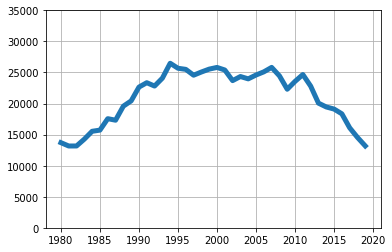

In [32]:
ax = df.loc[df["source"]=="k10plus"]["year_publication"].value_counts().sort_index().plot.line(linewidth = 5, grid= True)
ax.set_ylim(0,35000)


(0.0, 35000.0)

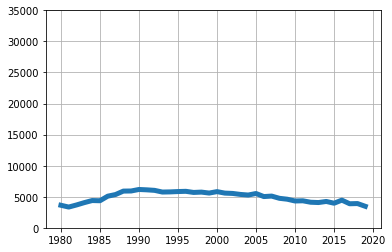

In [33]:
ax = df.loc[df["source"]=="hebis"]["year_publication"].value_counts().sort_index().plot.line(linewidth = 5, grid= True)
ax.set_ylim(0,35000)


(0.0, 35000.0)

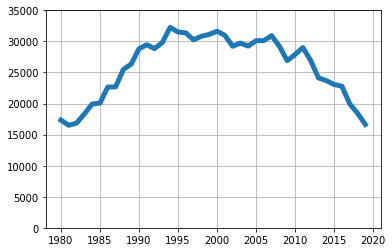

In [34]:
ax = df["year_publication"].value_counts().sort_index().plot.line(linewidth = 5, grid= True)
ax.set_ylim(0,35000)


## Year of Publication against Year of Entry in the Catalogue

In [35]:
df = df.loc[~df["entry_first"].str.contains("\-00\-")]

In [53]:
#df.loc[df["entry_first_date"].astype(int) < 2023]


In [54]:
df["entry_first_date"] = pd.to_datetime(df["entry_first"].str[-8:])

c:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df["entry_first_date_year"] = df["entry_first_date"].dt.year

c:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df = df.loc[df["entry_first_date_year"] < 2023]

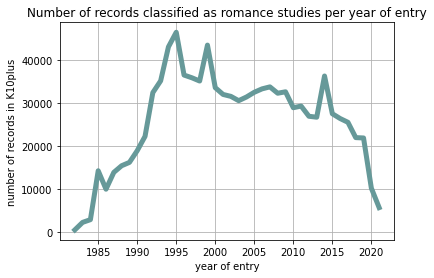

In [58]:
visualize.plot_line_year_value_counts(df["entry_first_date_year"], title = "Number of records classified as romance studies per year of entry", xlabel= "year of entry", ylabel= "number of records in K10plus", figure_name = "number_records_years_entry")

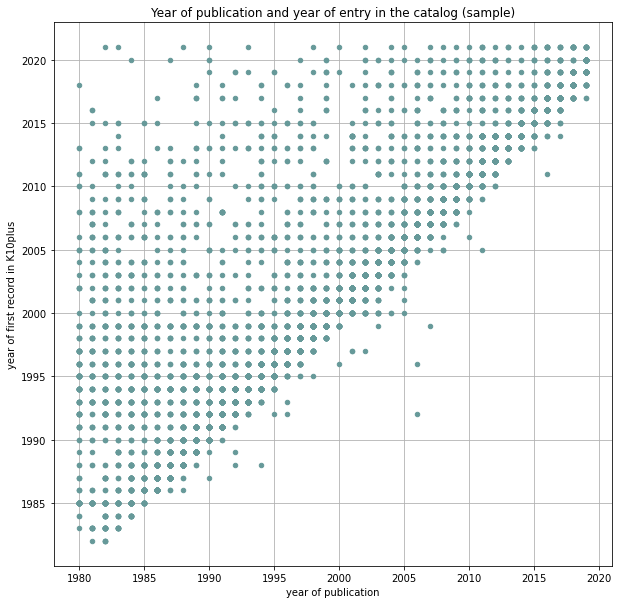

In [59]:
ax = df.sample(10000, random_state=2021).plot.scatter("year_publication", "entry_first_date_year", figsize=(10,10), grid=True, color =color, title ="Year of publication and year of entry in the catalog (sample)")
ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("year of first record in K10plus")
fig = ax.get_figure()
fig.savefig("./../visualizations/scatter_year_publication_year_entry_catalog.png")

In [60]:
Q1 = df.sample(10000, random_state=2021).groupby("year_publication")["entry_first_date_year"].quantile(0.25)
Q3 = df.sample(10000, random_state=2021).groupby("year_publication")["entry_first_date_year"].quantile(0.75)

IQR = Q3 - Q1
IQR.mean()


3.3125

In [61]:
IQR

year_publication
1980     7.25
1981    12.50
1982    14.00
1983    11.00
1984    10.00
1985    11.00
1986     7.00
1987     6.00
1988     5.75
1989     5.00
1990     3.00
1991     3.00
1992     2.00
1993     2.00
1994     2.00
1995     2.00
1996     2.00
1997     2.00
1998     2.00
1999     1.00
2000     1.00
2001     1.00
2002     1.00
2003     1.00
2004     1.00
2005     1.00
2006     1.00
2007     1.00
2008     1.00
2009     1.00
2010     1.00
2011     3.00
2012     1.00
2013     1.00
2014     1.00
2015     1.00
2016     1.00
2017     1.00
2018     1.00
2019     1.00
Name: entry_first_date_year, dtype: float64

In [62]:
IQR.mean()

3.3125

In [63]:
Q05 = df.groupby("year_publication")["entry_first_date_year"].quantile(0.05)
Q95 = df.groupby("year_publication")["entry_first_date_year"].quantile(0.95)

iqr90 = Q95 - Q05
iqr90_df = pd.DataFrame(iqr90)

iqr90_df

entry_first_date_year
year_publication                       
1980                               25.0
1981                               26.0
1982                               27.0
1983                               25.0
1984                               26.0
1985                               24.0
1986                               21.0
1987                               18.0
1988                               18.0
1989                               17.0
1990                               16.0
1991                               16.0
1992                               14.0
1993                               14.0
1994                               14.0
1995                               13.0
1996                               13.0
1997                               12.0
1998                               11.0
1999                               12.0
2000                               11.0
2001                               11.0
2002                               12.0
2003                               11.0
2004                               11.0
2005                               10.0
2006                               10.0
2007                                8.0
2008                                9.0
2009                                8.0
2010                                8.0
2011                                6.0
2012                                6.0
2013                                5.0
2014                                5.0
2015                                5.0
2016                                4.0
2017                                4.0
2018                                4.0
2019                                2.0

In [64]:
iqr90_df

entry_first_date_year
year_publication                       
1980                               25.0
1981                               26.0
1982                               27.0
1983                               25.0
1984                               26.0
1985                               24.0
1986                               21.0
1987                               18.0
1988                               18.0
1989                               17.0
1990                               16.0
1991                               16.0
1992                               14.0
1993                               14.0
1994                               14.0
1995                               13.0
1996                               13.0
1997                               12.0
1998                               11.0
1999                               12.0
2000                               11.0
2001                               11.0
2002                               12.0
2003                               11.0
2004                               11.0
2005                               10.0
2006                               10.0
2007                                8.0
2008                                9.0
2009                                8.0
2010                                8.0
2011                                6.0
2012                                6.0
2013                                5.0
2014                                5.0
2015                                5.0
2016                                4.0
2017                                4.0
2018                                4.0
2019                                2.0

In [65]:
iqr90_df.mean()

entry_first_date_year    12.8
dtype: float64

In [66]:
iqr90_df.iloc[25:35].mean()

entry_first_date_year    7.5
dtype: float64

<AxesSubplot:title={'center':'How long did it take for the 90% of the publications to get into the catalogue?\n (95th Quantile - 5th Quantile of year of entry)'}, xlabel='year_publication'>

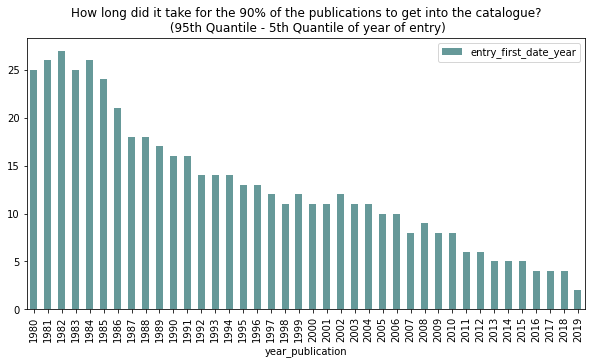

In [67]:
iqr90_df.plot.bar(figsize=(10,5), title ="How long did it take for the 90% of the publications to get into the catalogue?\n (95th Quantile - 5th Quantile of year of entry)", color = color)

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

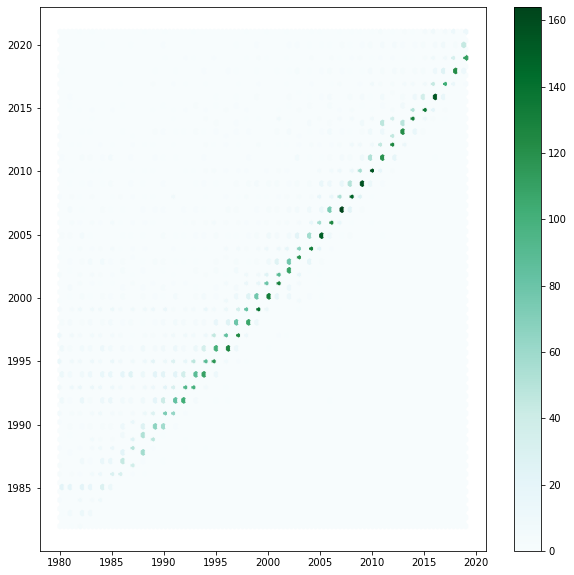

In [68]:
df.sample(10000, random_state=2021).plot.hexbin("year_publication", "entry_first_date_year", figsize=(10,10))

<AxesSubplot:xlabel='entry_first_date_year', ylabel='year_publication'>

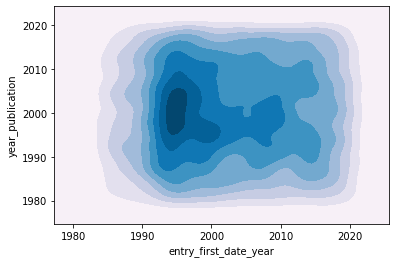

In [69]:
sns.kdeplot(df.sample(10000, random_state=2021)['entry_first_date_year'], df.sample(10000)['year_publication'], shade=True, cmap='PuBu')

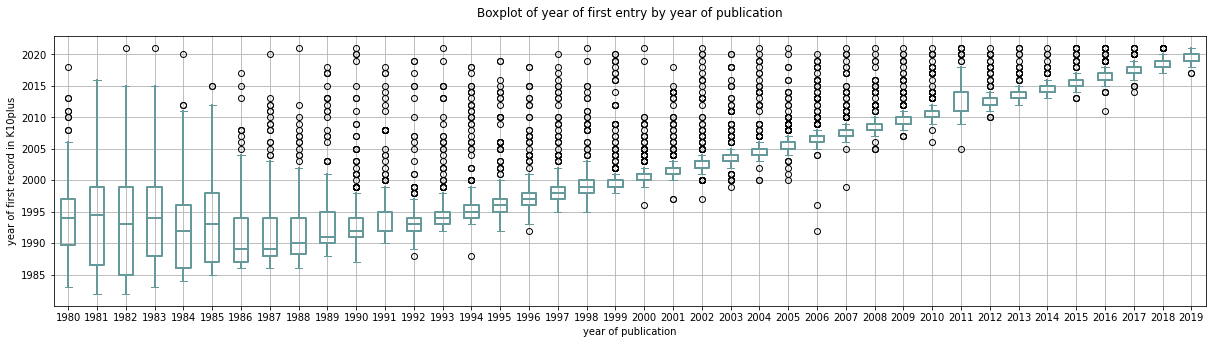

In [70]:
visualize.plot_boxplots_by(df.sample(10000, random_state=2021), column_to_plot = "entry_first_date_year", column_by = "year_publication", xlabel= "year of publication", ylabel= "year of first record in K10plus",
title = "Boxplot of year of first entry by year of publication",
figure_name = "boxplot_year_publication_year_entry_catalog")